<div style="text-align: center;">
    <h1>Kaggle Titanic Death Prediction Challenge 🚢</h1>
    <img src="./src/338ec5a6964c3cb1778b4ad6dc4da88e.gif" alt="Gif do Titanic" style="max-width: 100%; height: auto;">
</div>

---

## Libraries Used

This project uses the following Python libraries for data analysis and visualization:

- 🐼 **[Pandas](https://pandas.pydata.org/docs/)**: Data manipulation and analysis.
- 🔢 **[NumPy](https://numpy.org/doc/stable/)**: Support for mathematical operations and array manipulation.
- 📊 **[Matplotlib](https://matplotlib.org/stable/contents.html)**: Creation of basic graphs and visualizations.
- 🌊 **[Seaborn](https://seaborn.pydata.org/)**: Advanced and stylized statistical visualizations.
- 🤖 **[Scikit-learn](https://scikit-learn.org/stable/user_guide.html)**: Predictive modeling and machine learning.

Make sure to install all libraries before running the code. Use the command below to install them:

```bash
pip install pandas numpy matplotlib seaborn scikit-learn
```

---



<div style="text-align: center;">
    <h1>1 - Import Libraries</h1>
</div>

---

In [28]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from bayes_opt import BayesianOptimization

In [29]:
warnings.filterwarnings('ignore')

---
<div style="text-align: center;">
    <h1>2 - Read And Explain Dataset</h1>
</div>

---

In [30]:
train = pd.read_csv("Data/train.csv")

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [33]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

---

## Titanic Challenge Summary

The Titanic Challenge on Kaggle is a binary classification task aimed at predicting whether a passenger survived the Titanic disaster based on their personal attributes and ticket details.

### Objective
Predict the `Survived` status (1 for survived, 0 for not survived) for each passenger in the test dataset using the training dataset.

### Dataset Overview
- **Training Data (`train.csv`)**: Contains labeled data (with `Survived` column).
- **Test Data (`test.csv`)**: Contains unlabeled data where predictions need to be made.

#### Key Features:
- `Survival`: 0 = No, 1 = Yes.
- `Pclass`: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).
- `Sex`: Gender of the passenger.
- `Age`: Age of the passenger.
- `SibSp`: Number of siblings/spouses aboard.
- `Parch`: Number of parents/children aboard.
- `Fare`: Ticket fare.
- `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

### Evaluation
The predictions are evaluated using **accuracy**, calculated as the percentage of correctly predicted outcomes in the test set.

### Steps to Solve the Challenge
1. **Data Exploration**:
   - Analyze missing values, distributions, and correlations.
2. **Data Preprocessing**:
   - Fill missing values and encode categorical variables.
3. **Feature Engineering**:
   - Create new features like family size or categorize age groups.
4. **Model Building**:
   - Train machine learning models to predict survival.
5. **Submission**:
   - Generate predictions for the test set and submit to Kaggle.

### Tools Used
- Python for data analysis and modeling.
- Libraries: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn.

For more details, visit the [Titanic Challenge on Kaggle](https://www.kaggle.com/c/titanic).

---

<div style="text-align: center;">
    <h1>3 - Correlation Matrix</h1>
</div>

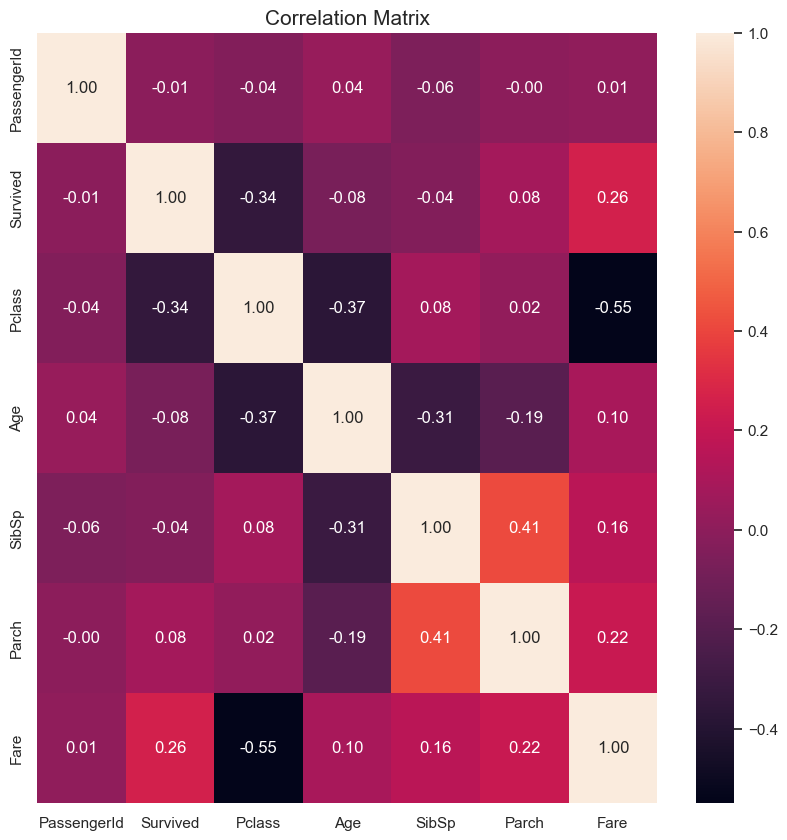

In [34]:
numerical_data = train.select_dtypes(include=['number'])
corr_matrix = numerical_data.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cbar=True)
plt.title('Correlation Matrix',fontsize=15)
plt.show()


---

<div style="text-align: center;">
    <h1>4 - Univariate Analysis</h1>
</div>


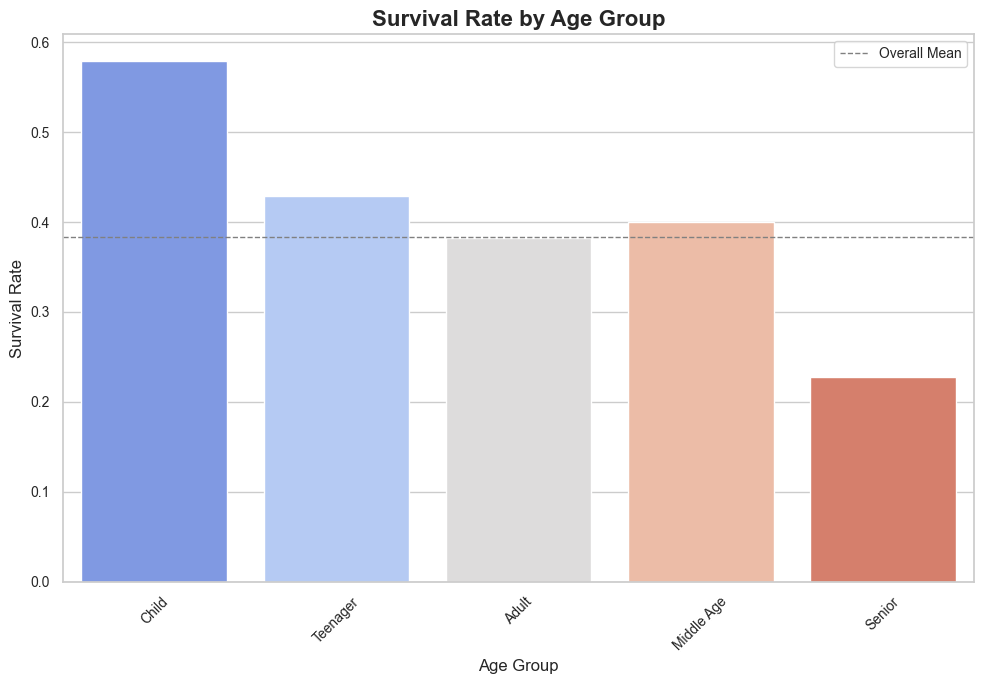

In [35]:
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 12, 18, 35, 60, 120], 
                           labels=['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior'])

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 7))
sns.barplot(
    data=train, 
    x='AgeGroup', 
    y='Survived', 
    ci=None, 
    palette='coolwarm'
)

plt.title("Survival Rate by Age Group", fontsize=16, fontweight='bold')
plt.ylabel("Survival Rate", fontsize=12)
plt.xlabel("Age Group", fontsize=12)

plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

plt.axhline(y=train['Survived'].mean(), color='gray', linestyle='--', linewidth=1, label='Overall Mean')
plt.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


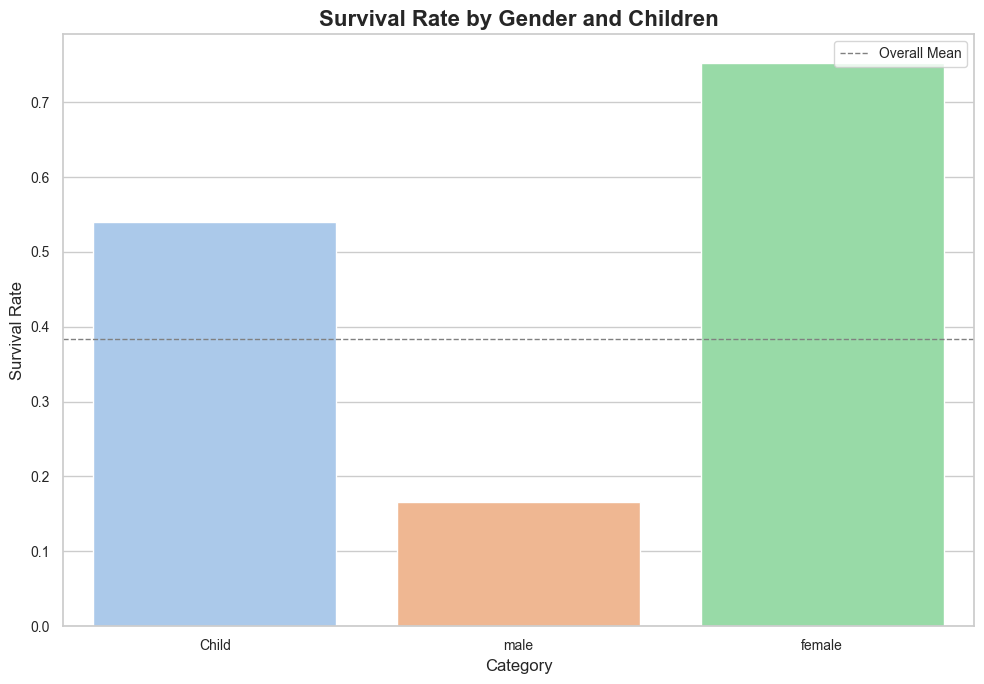

In [36]:
train['GenderChild'] = train.apply(
    lambda row: 'Child' if row['Age'] < 18 else row['Sex'], axis=1
)

plt.figure(figsize=(10, 7))
sns.barplot(
    data=train, 
    x='GenderChild', 
    y='Survived', 
    errorbar=None, 
    order=['Child', 'male', 'female'], 
    palette='pastel'
)
plt.title("Survival Rate by Gender and Children", fontsize=16, fontweight='bold')
plt.ylabel("Survival Rate", fontsize=12)
plt.xlabel("Category", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.axhline(y=train['Survived'].mean(), color='gray', linestyle='--', linewidth=1, label='Overall Mean')
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

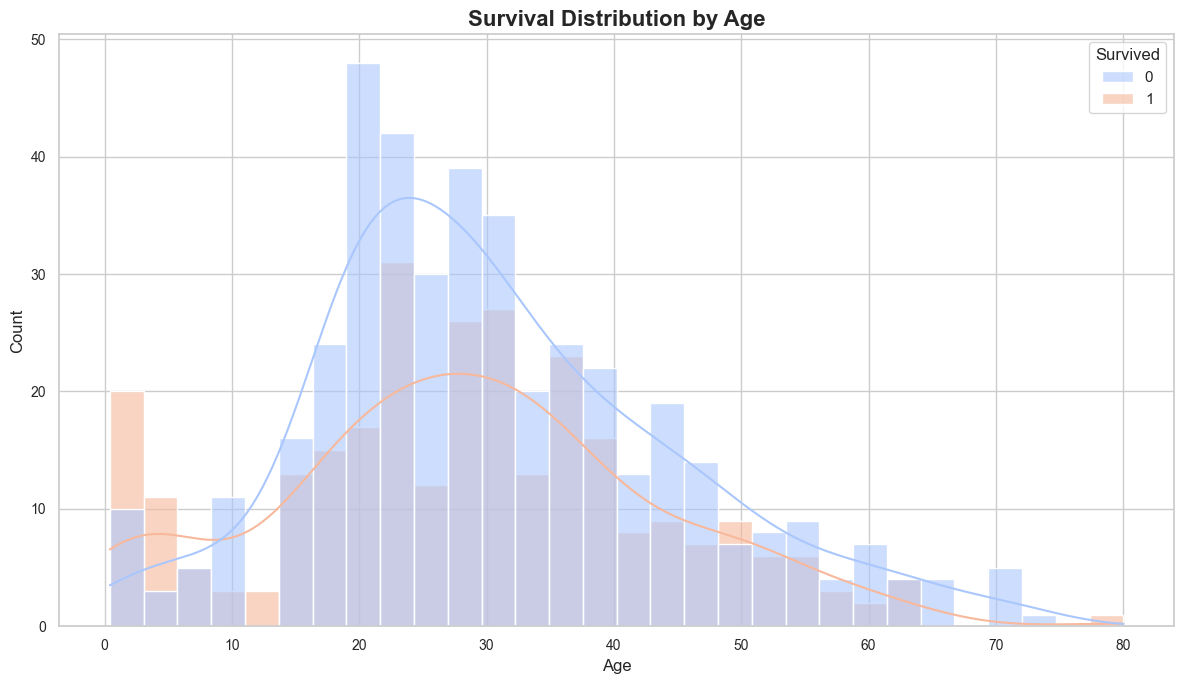

In [37]:
filtered_data = train.dropna(subset=['Age'])

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))
sns.histplot(
    data=filtered_data, 
    x='Age', 
    hue='Survived', 
    bins=30, 
    kde=True, 
    palette='coolwarm', 
    alpha=0.6
)
plt.title("Survival Distribution by Age", fontsize=16, fontweight='bold')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Age", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

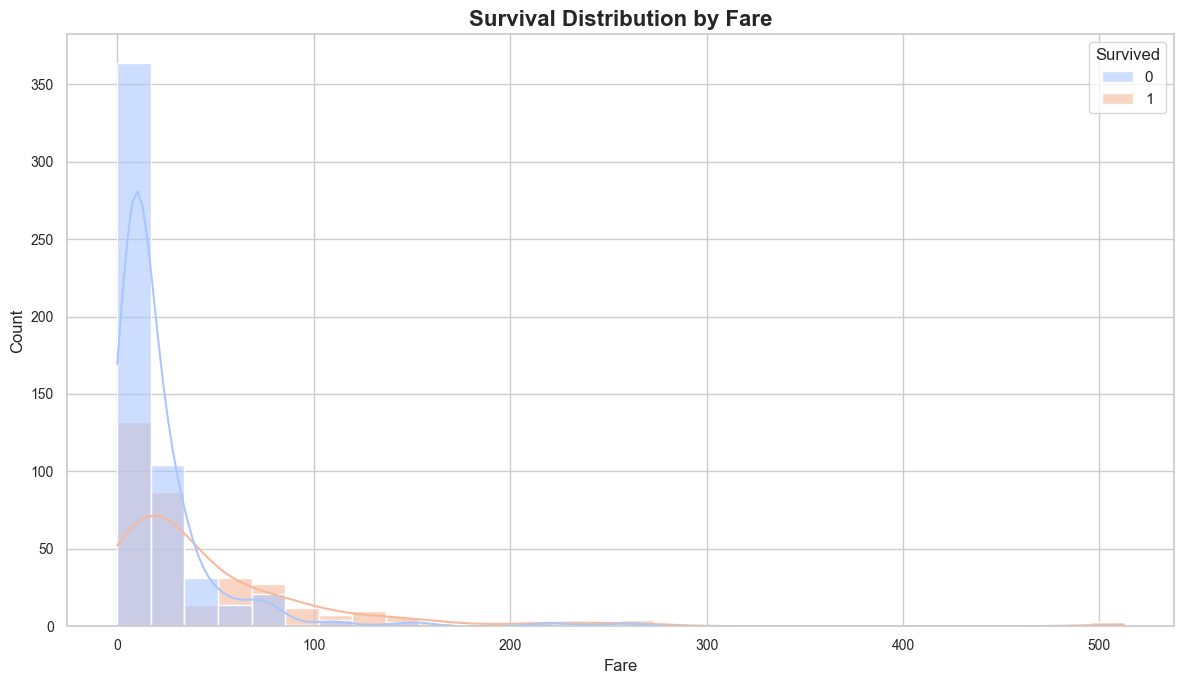

In [38]:
filtered_data_fare = train.dropna(subset=['Fare'])
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))
sns.histplot(
    data=filtered_data_fare, 
    x='Fare', 
    hue='Survived', 
    bins=30, 
    kde=True, 
    palette='coolwarm', 
    alpha=0.6
)
plt.title("Survival Distribution by Fare", fontsize=16, fontweight='bold')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Fare", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [39]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64



---

<div style="text-align: center;">
    <h1>5 - Dealing with Outliers</h1>
</div>


In [40]:
train = train.drop(columns=['GenderChild', 'AgeGroup'])
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
train['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

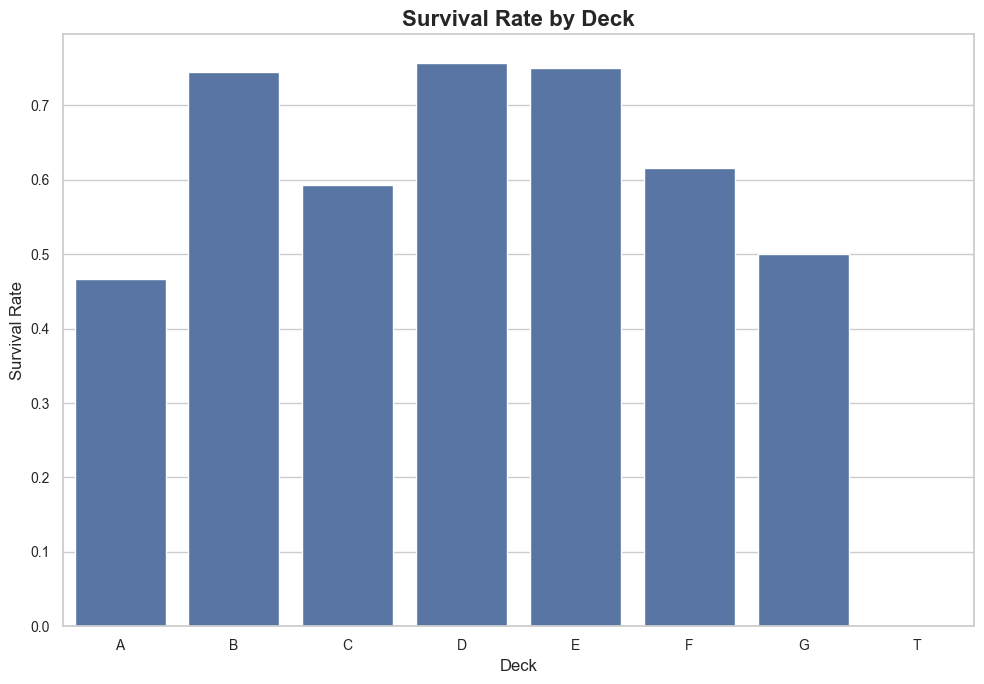

In [42]:
cabin_data = train.dropna(subset=['Cabin']).copy()
cabin_data.loc[:, 'Deck'] = cabin_data['Cabin'].str[0]

survivors_by_deck = cabin_data.groupby('Deck')['Survived'].mean().sort_index()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 7))
sns.barplot(x=survivors_by_deck.index, y=survivors_by_deck.values, errorbar=None)

plt.title("Survival Rate by Deck", fontsize=16, fontweight='bold')
plt.xlabel("Deck", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [43]:
cabin_data[cabin_data['Deck'] == 'T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,T


In [44]:
cabin_data = cabin_data[cabin_data['Deck'] != 'T']

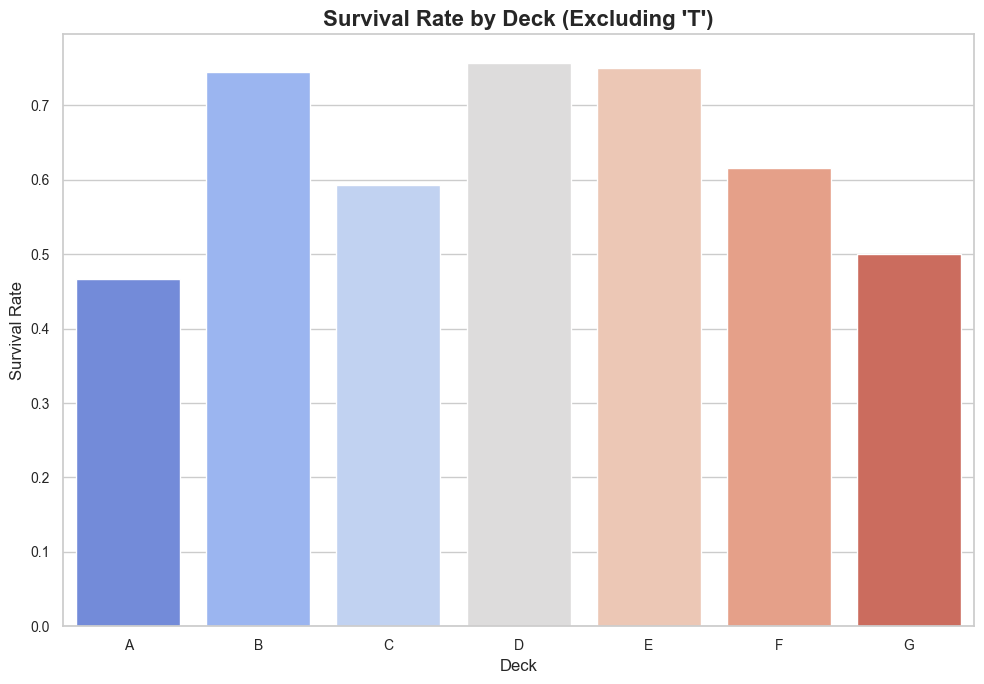

In [45]:
cabin_data = cabin_data[cabin_data['Deck'] != 'T']

survivors_by_deck = cabin_data.groupby('Deck')['Survived'].mean().sort_index()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 7))
sns.barplot(x=survivors_by_deck.index, y=survivors_by_deck.values, errorbar=None, palette="coolwarm")

plt.title("Survival Rate by Deck (Excluding 'T')", fontsize=16, fontweight='bold')
plt.xlabel("Deck", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [46]:
numerical_cols = train.select_dtypes(include=['number']).columns

def handle_outliers(df, columns):
    outlier_info = {}
    for col in columns:
        Q1 = df[col].quantile(0.20)
        Q3 = df[col].quantile(0.80)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_info[col] = len(outliers)

        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df, outlier_info

train_cleaned, outliers_detected = handle_outliers(train, numerical_cols)

print("Outliers detected per column:")
for col, count in outliers_detected.items():
    print(f"{col}: {count} outliers handled.")

Outliers detected per column:
PassengerId: 0 outliers handled.
Survived: 0 outliers handled.
Pclass: 0 outliers handled.
Age: 1 outliers handled.
SibSp: 46 outliers handled.
Parch: 15 outliers handled.
Fare: 63 outliers handled.



---

<div style="text-align: center;">
    <h1>6 - Feature Engineering</h1>
</div>


In [47]:
# ========================== FEATURE ENGINEERING ==========================

import pandas as pd

def feature_engineering(test_data, train_data=None):
    """
    Função para engenharia de features no dataset de teste.
    Se o dataset de treino for fornecido, usa informações dele para enriquecer o teste.
    """
    # Criar novas features

    # Verificar se a coluna 'Cabin' existe antes de extrair Deck
    if 'Cabin' in test_data.columns:
        test_data['Deck'] = test_data['Cabin'].astype(str).str[0]
        test_data['Deck'] = test_data['Deck'].replace({'T': 'Unknown'})
        test_data['Deck'].fillna('Unknown', inplace=True)
    else:
        test_data['Deck'] = 'Unknown'

    # Criar CabinBool (1 se possui cabine, 0 se não)
    if 'Cabin' in test_data.columns:
        test_data['CabinBool'] = test_data['Cabin'].notna().astype(int)
    else:
        test_data['CabinBool'] = 0

    # Preencher Age baseado no Title
    if train_data is not None and 'Title' in train_data.columns and 'Age' in train_data.columns:
        title_age_medians = train_data.groupby('Title')['Age'].median()
        test_data['Age'] = test_data.apply(lambda row: title_age_medians.get(row['Title'], test_data['Age'].median()) if pd.isnull(row['Age']) else row['Age'], axis=1)
    else:
        test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

    # Remover colunas desnecessárias apenas se existirem
    cols_to_drop = ['Name', 'Ticket', 'Cabin']
    test_data.drop(columns=[col for col in cols_to_drop if col in test_data.columns], inplace=True)

    # Converter variáveis categóricas para numéricas
    test_data['Deck'] = test_data['Deck'].astype('category').cat.codes

    # Garantir que test_data tenha as mesmas features do modelo treinado
    if train_data is not None:
        expected_features = train_data.drop(columns=['Survived'], errors='ignore').columns
        for col in expected_features:
            if col not in test_data.columns:
                test_data[col] = 0  # Adiciona colunas ausentes com valor 0
        test_data = test_data[expected_features]

    return test_data

In [48]:
train_cleaned['FamilySize'] = train_cleaned['SibSp'] + train_cleaned['Parch'] + 1
train_cleaned['IsAlone'] = (train_cleaned['FamilySize'] == 1).astype(int)

train_cleaned['Title'] = train_cleaned['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)

train_cleaned['FarePerPerson'] = train_cleaned['Fare'] / train_cleaned['FamilySize']

train_cleaned['AgeGroup'] = pd.cut(
    train_cleaned['Age'], 
    bins=[0, 12, 18, 35, 60, 120], 
    labels=['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior']
)

train_cleaned['Sex'] = train_cleaned['Sex'].map({'male': 0, 'female': 1})
train_cleaned['Embarked'] = train_cleaned['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
train_cleaned['Title'] = train_cleaned['Title'].map({
    'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dr': 4, 'Rev': 5,
    'Col': 6, 'Major': 6, 'Mlle': 7, 'Mme': 7, 'Countess': 8,
    'Lady': 8, 'Jonkheer': 8, 'Sir': 8, 'Don': 8, 'Dona': 8, 'Capt': 8
}).fillna(9) 

train_cleaned['FarePerPerson'] = train_cleaned['FarePerPerson'].fillna(train_cleaned['FarePerPerson'].median())

print(train_cleaned[['FamilySize', 'IsAlone', 'Title', 'FarePerPerson', 'AgeGroup']].head())


   FamilySize  IsAlone  Title  FarePerPerson    AgeGroup
0         2.0        0    0.0        3.62500       Adult
1         2.0        0    2.0       35.64165  Middle Age
2         1.0        1    1.0        7.92500       Adult
3         2.0        0    2.0       26.55000       Adult
4         1.0        1    0.0        8.05000       Adult


Correlation of new features with Survived:
Survived         1.000000
Title            0.354494
FarePerPerson    0.276283
FamilySize       0.084253
IsAlone         -0.203367
Name: Survived, dtype: float64


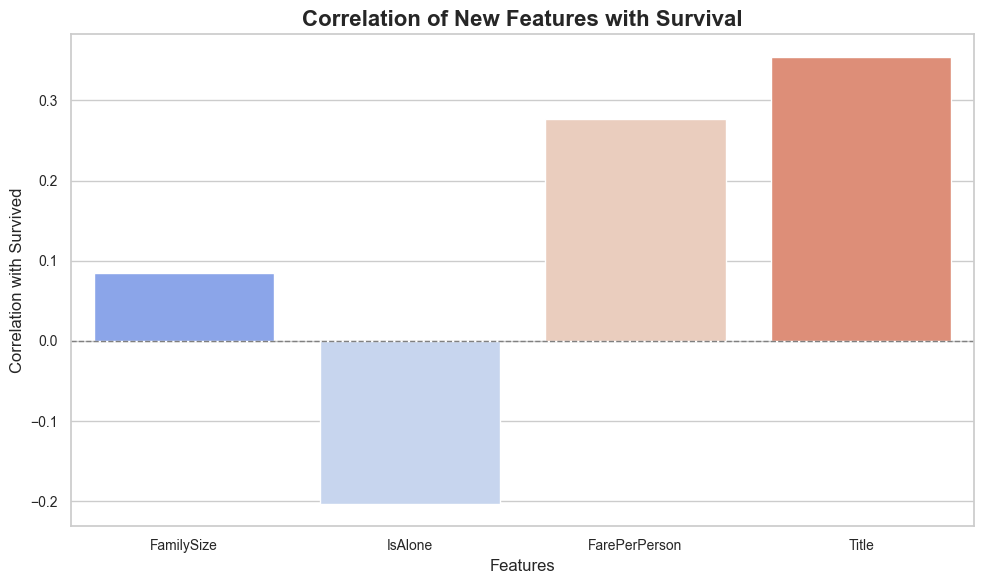

Training set size: (712, 13)
Test set size: (179, 13)


In [49]:
new_features = ['FamilySize', 'IsAlone', 'FarePerPerson', 'Title']
correlations = train_cleaned[new_features + ['Survived']].corr()

print("Correlation of new features with Survived:")
print(correlations['Survived'].sort_values(ascending=False))

plt.figure(figsize=(10, 6))
sns.barplot(
    x=correlations['Survived'][new_features].index,
    y=correlations['Survived'][new_features].values,
    palette='coolwarm'
)
plt.title("Correlation of New Features with Survival", fontsize=16, fontweight='bold')
plt.ylabel("Correlation with Survived", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

X = train_cleaned.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_cleaned['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


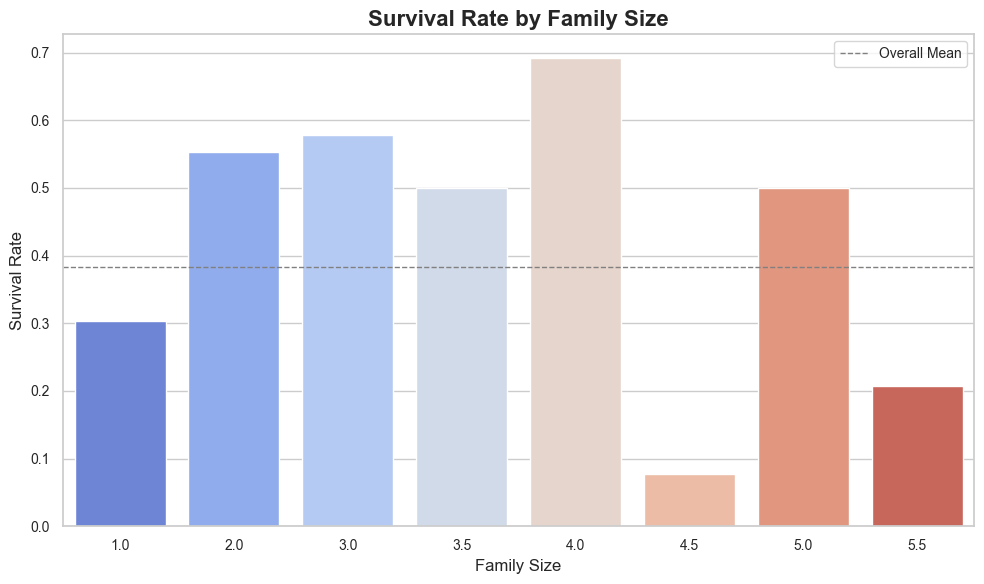

In [50]:
family_survival = train_cleaned.groupby('FamilySize')['Survived'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=family_survival.index, y=family_survival.values, palette='coolwarm')
plt.title("Survival Rate by Family Size", fontsize=16, fontweight='bold')
plt.xlabel("Family Size", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.axhline(y=train_cleaned['Survived'].mean(), color='gray', linestyle='--', linewidth=1, label='Overall Mean')
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()


---

<div style="text-align: center;">
    <h1>7 - Modeling and Model Evaluation</h1>
</div>

In [51]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


In [52]:
model_results = []

def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    cross_val = cross_val_score(model, X_train, y_train, cv=5).mean()
    
    model_results.append({
        'Modelo': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'MSE': mse,
        'Cross_Val_Score': cross_val
    })
    
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}, MSE: {mse:.4f}, Cross Val Score: {cross_val:.4f}")


In [53]:
models = [
    (LogisticRegression(), "Regressão Logística"),
    (DecisionTreeClassifier(), "Árvore de Decisão"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (SVC(), "Support Vector Machine"),
    (RandomForestClassifier(), "Random Forest"),
    (GradientBoostingClassifier(), "Gradient Boosting"),
    (HistGradientBoostingClassifier(), "HistGradient Boosting"),
    (AdaBoostClassifier(), "AdaBoost"),
    (BaggingClassifier(), "Bagging Classifier"),
    (LGBMClassifier(), "LightGBM"),
    (CatBoostClassifier(verbose=0), "CatBoost")
]

for model, name in models:
    evaluate_model(model, name)

results_df = pd.DataFrame(model_results)
print(results_df)


Regressão Logística - Accuracy: 0.7654, Precision: 0.7105, Recall: 0.7297, F1-score: 0.7200, MSE: 0.2346, Cross Val Score: 0.8019
Árvore de Decisão - Accuracy: 0.7654, Precision: 0.7424, Recall: 0.6622, F1-score: 0.7000, MSE: 0.2346, Cross Val Score: 0.7388
K-Nearest Neighbors - Accuracy: 0.6648, Precision: 0.6346, Recall: 0.4459, F1-score: 0.5238, MSE: 0.3352, Cross Val Score: 0.6081
Support Vector Machine - Accuracy: 0.6480, Precision: 0.8235, Recall: 0.1892, F1-score: 0.3077, MSE: 0.3520, Cross Val Score: 0.6643
Random Forest - Accuracy: 0.8324, Precision: 0.7973, Recall: 0.7973, F1-score: 0.7973, MSE: 0.1676, Cross Val Score: 0.8019
Gradient Boosting - Accuracy: 0.8547, Precision: 0.8243, Recall: 0.8243, F1-score: 0.8243, MSE: 0.1453, Cross Val Score: 0.8174


  File "c:\Users\julio\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


HistGradient Boosting - Accuracy: 0.7877, Precision: 0.7368, Recall: 0.7568, F1-score: 0.7467, MSE: 0.2123, Cross Val Score: 0.8020
AdaBoost - Accuracy: 0.8212, Precision: 0.7692, Recall: 0.8108, F1-score: 0.7895, MSE: 0.1788, Cross Val Score: 0.8090
Bagging Classifier - Accuracy: 0.8492, Precision: 0.8219, Recall: 0.8108, F1-score: 0.8163, MSE: 0.1508, Cross Val Score: 0.7935
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [54]:
rf_bo = BayesianOptimization(
    f=lambda n_estimators, max_depth: cross_val_score(
        RandomForestClassifier(n_estimators=int(n_estimators), max_depth=int(max_depth)), X_train, y_train, cv=5).mean(),
    pbounds={'n_estimators': (10, 200), 'max_depth': (3, 30)},
    random_state=42
)
rf_bo.maximize()

best_rf_params = rf_bo.max['params']
best_rf = RandomForestClassifier(n_estimators=int(best_rf_params['n_estimators']), max_depth=int(best_rf_params['max_depth']))
evaluate_model(best_rf, "Random Forest Otimizado")

|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
| 1         | 0.8061    | 13.11     | 190.6     |
| 2         | 0.8048    | 22.76     | 123.7     |
| 3         | 0.816     | 7.213     | 39.64     |
| 4         | 0.823     | 4.568     | 174.6     |
| 5         | 0.7977    | 19.23     | 144.5     |
| 6         | 0.8159    | 4.036     | 175.5     |
| 7         | 0.8188    | 4.675     | 173.0     |
| 8         | 0.8188    | 6.54      | 174.5     |
| 9         | 0.8033    | 7.768     | 42.98     |
| 10        | 0.8173    | 6.289     | 36.86     |
| 11        | 0.816     | 8.849     | 37.22     |
| 12        | 0.8019    | 3.496     | 37.95     |
| 13        | 0.816     | 7.082     | 33.91     |
| 14        | 0.8104    | 9.943     | 33.99     |
| 15        | 0.816     | 6.764     | 176.8     |
| 16        | 0.8104    | 9.866     | 175.9     |
| 17        | 0.8104    | 7.27      | 171.4     |
| 18        | 0.8132    | 4.951     | 31.72     |


---

<div style="text-align: center;">
    <h1>8 - Hyperparameter Optimization</h1>
</div>

In [55]:
gb_bo = BayesianOptimization(
    f=lambda learning_rate, n_estimators: cross_val_score(
        GradientBoostingClassifier(
            learning_rate=learning_rate, 
            n_estimators=int(n_estimators),
            max_depth=5 
        ), X_train, y_train, cv=5, scoring="accuracy"
    ).mean(),
    pbounds={'learning_rate': (0.01, 0.3), 'n_estimators': (50, 300)},
    random_state=42,
    verbose=0 
)
gb_bo.maximize(init_points=5, n_iter=20)

gb_params = gb_bo.max['params']
best_gb = GradientBoostingClassifier(
    learning_rate=gb_params['learning_rate'], 
    n_estimators=int(gb_params['n_estimators']),
    max_depth=5
)
evaluate_model(best_gb, "Gradient Boosting Otimizado")

lgbm_bo = BayesianOptimization(
    f=lambda num_leaves, n_estimators: cross_val_score(
        LGBMClassifier(
            num_leaves=int(num_leaves), 
            n_estimators=int(n_estimators),
            min_data_in_leaf=20,
            min_gain_to_split=0.01,
            lambda_l1=0.1, lambda_l2=0.1,
            scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
            verbose=-1 
        ), X_train, y_train, cv=5, scoring="accuracy"
    ).mean(),
    pbounds={'num_leaves': (20, 50), 'n_estimators': (50, 300)},
    random_state=42,
    verbose=0 
)
lgbm_bo.maximize(init_points=5, n_iter=20)

lgbm_params = lgbm_bo.max['params']
best_lgbm = LGBMClassifier(
    num_leaves=int(lgbm_params['num_leaves']), 
    n_estimators=int(lgbm_params['n_estimators']),
    min_data_in_leaf=20,
    min_gain_to_split=0.01,
    lambda_l1=0.1, lambda_l2=0.1,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    verbose=-1
)
evaluate_model(best_lgbm, "LightGBM Otimizado")


Gradient Boosting Otimizado - Accuracy: 0.8380, Precision: 0.8261, Recall: 0.7703, F1-score: 0.7972, MSE: 0.1620, Cross Val Score: 0.8188
LightGBM Otimizado - Accuracy: 0.8045, Precision: 0.7407, Recall: 0.8108, F1-score: 0.7742, MSE: 0.1955, Cross Val Score: 0.8132
